# One-state GLM-HMM

## 1. Setup

In [28]:
# Import libraries
# import sys; sys.path.insert(0,r'C:\Users\Charles\Documents\Workspace\Packages\Python\ssm\ssm')
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation

npr.seed(0)

### 1.1 Test package

In [2]:
T = 100  # number of time bins
K = 5    # number of discrete states
D = 2    # dimension of the observations

# make an hmm and sample from it
hmm = ssm.HMM(K, D, observations="gaussian")
z, y = hmm.sample(T)

In [3]:
test_hmm = ssm.HMM(K, D, observations="gaussian")
test_hmm.fit(y)
zhat = test_hmm.most_likely_states(y)

  0%|          | 0/100 [00:00<?, ?it/s]

## 2. Implement Input Driven Observations ("GLM-HMM") from `ssm` as practice

### 2.1 Initialize

In [26]:
# Setting parameters for the GLM-HMM
num_states = 3        # number of discrete states. 1 for equivalent to GLM
obs_dim = 1           # number of observed dimensions. 1 for simply measuring different behavioral categories
num_categories = 2    # number of categories for output. c for c different brhavioral categories
input_dim = 2        # input dimensions. d for d number of neurons

# Make a GLM-HMM
true_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

### 2.2 Specify parameters

In [6]:
gen_weights = np.array([[[6, 1]], [[2, -3]], [[2, 3]]])
gen_log_trans_mat = np.log(np.array([[[0.98, 0.01, 0.01], [0.05, 0.92, 0.03], [0.03, 0.03, 0.94]]]))
true_glmhmm.observations.params = gen_weights
true_glmhmm.transitions.params = gen_log_trans_mat

Text(0.5, 1.0, 'Generative transition matrix')

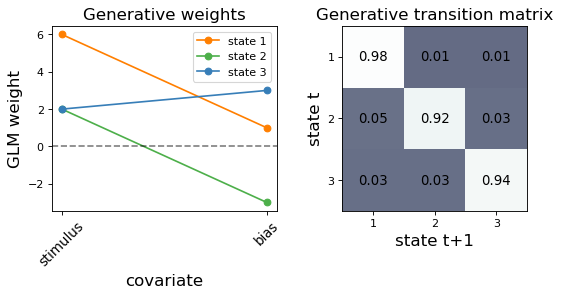

In [27]:
# Plot generative parameters:
fig = plt.figure(figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
cols = ['#ff7f00', '#4daf4a', '#377eb8']
for k in range(num_states):
    plt.plot(range(input_dim), gen_weights[k][0], marker='o',
             color=cols[k], linestyle='-',
             lw=1.5, label="state " + str(k+1))
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("covariate", fontsize=15)
plt.xticks([0, 1], ['stimulus', 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend()
plt.title("Generative weights", fontsize = 15)

plt.subplot(1, 2, 2)
gen_trans_mat = np.exp(gen_log_trans_mat)[0]
plt.imshow(gen_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(gen_trans_mat.shape[0]):
    for j in range(gen_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(gen_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.ylabel("state t", fontsize = 15)
plt.xlabel("state t+1", fontsize = 15)
plt.title("Generative transition matrix", fontsize = 15)

### 2.3 Simulate input

In [ ]:
num_sess = 20 # number of example sessions
num_trials_per_sess = 100 # number of trials in a session
inpts = np.ones((num_sess, num_trials_per_sess, input_dim)) # initialize inpts array
stim_vals = [-1, -0.5, -0.25, -0.125, -0.0625, 0, 0.0625, 0.125, 0.25, 0.5, 1]
inpts[:,:,0] = np.random.choice(stim_vals, (num_sess, num_trials_per_sess)) # generate random sequence of stimuli
inpts = list(inpts) #convert inpts to correct format

### 2.4 

## 3. Create design matrix

## 4. Implement GLM-HMM from scratch

### 4.1 Implement closed-form GLM

In [ ]:
class glmhmm(object):
    def __init__(self, M, C):
        """
        @param C:  number of classes in the categorical observations
        """
        self.M = M
        self.C = C
        # Parameters linking input to state distribution
        self.Wk = npr.randn(1, C - 1, M + 1)

